<a href="https://colab.research.google.com/github/MonirulIslamm08/Online-Job-Postings-Resume-Screening-with-NLP/blob/main/Online_Job_Postings_Resume_Screening_with_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('/content/data job posts.csv')
df.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [2]:
 df.shape

(19001, 24)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

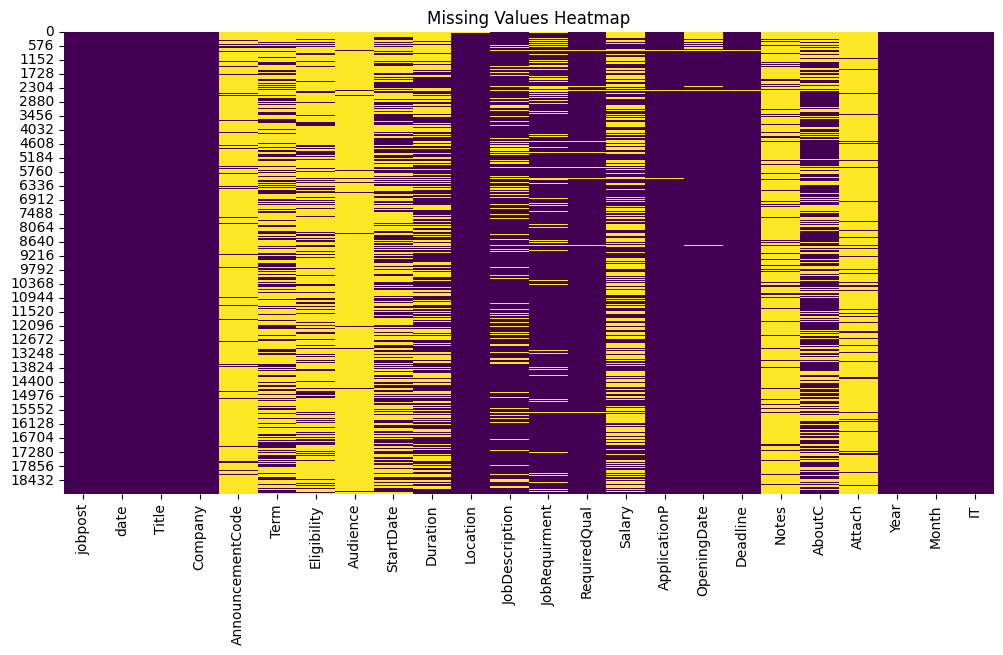

In [5]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [6]:
cols_to_drop = ['AnnouncementCode', 'Audience', 'Notes', 'Attach', 'Eligibility', 'Term']
df = df.drop(columns=cols_to_drop)

In [7]:
df.tail(3)

,jobpost,date,Title,Company,StartDate,Duration,Location,JobDescription,JobRequirment,RequiredQual,Salary,ApplicationP,OpeningDate,Deadline,AboutC,Year,Month,IT
18998,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Operational Marketing Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",ASAP,Long-term with a probation period of 3 months.,"Yerevan, Armenia",NaN,"- Develop, establish and maintain marketing st...","- Degree in Business, Marketing or a related f...",NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,2015,12,False
18999,San Lazzaro LLC\r\n\r\n\r\nTITLE: Head of O...,"Dec 30, 2015",Head of Online Sales Department,San Lazzaro LLC,NaN,Long-term,"Yerevan, Armenia",San Lazzaro LLC is looking for a well-experien...,- Handle the project activites of the online s...,- At least 1 year of experience in online sale...,Highly competitive,Interested candidates can send their CVs to:\r...,30 December 2015,29 January 2016,San Lazzaro LLC works with several internation...,2015,12,False
19000,"""Kamurj"" UCO CJSC\r\n\r\n\r\nTITLE: Lawyer in...","Dec 30, 2015",Lawyer in Legal Department,"""Kamurj"" UCO CJSC",NaN,Indefinite,"Yerevan, Armenia","""Kamurj"" UCO CJSC is looking for a Lawyer in L...",- Properly provide internal legal services of ...,- Higher legal education; Master's degree is a...,NaN,All qualified applicants are encouraged to\r\n...,30 December 2015,20 January 2016,"""Kamurj"" UCO CJSC is providing micro and small...",2015,12,False


# Job Titles Distribution

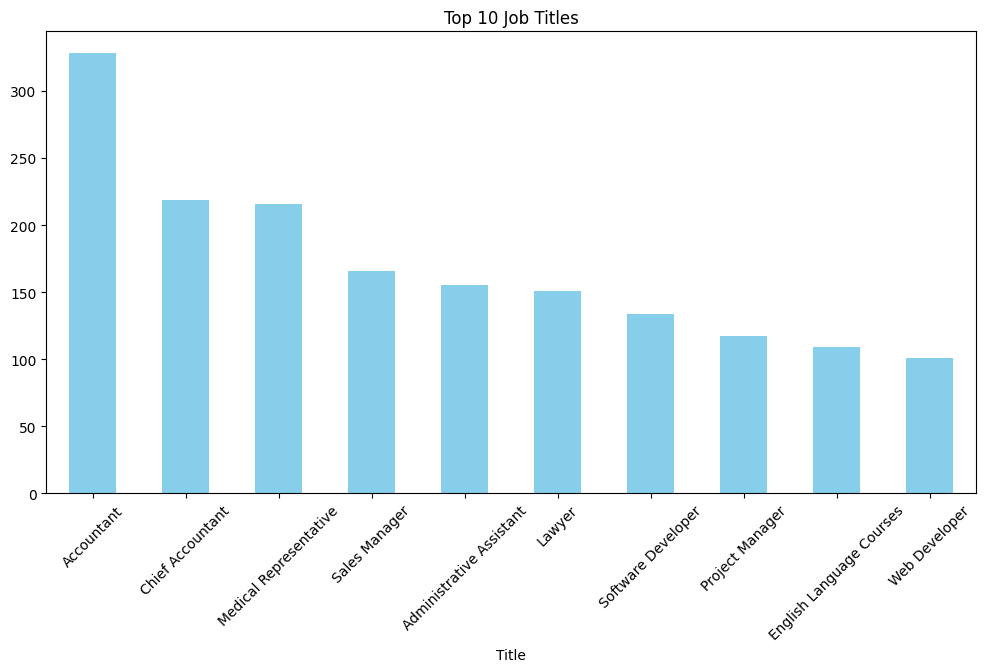

In [8]:
plt.figure(figsize=(12, 6))
df['Title'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Job Titles")
plt.xticks(rotation=45)
plt.show()

# Company Distribution

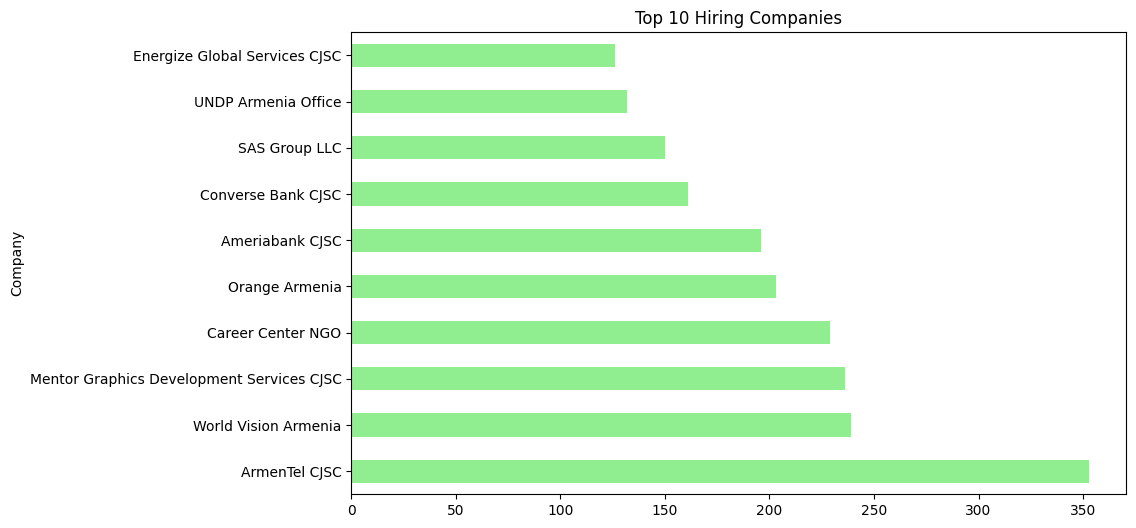

In [10]:
plt.figure(figsize=(10, 6))
df['Company'].value_counts().head(10).plot(kind='barh', color='lightgreen')
plt.title("Top 10 Hiring Companies")
plt.show()

# IT Jobs vs. Non-IT Jobs

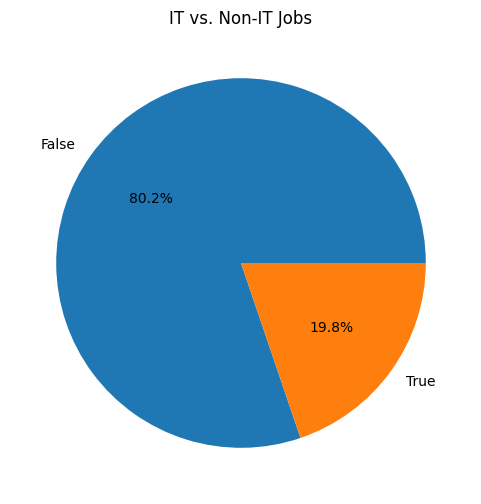

In [12]:
plt.figure(figsize=(6, 6))
df['IT'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("IT vs. Non-IT Jobs")
plt.ylabel("")
plt.show()

# Month-wise job posting distribution with IT & nonIT

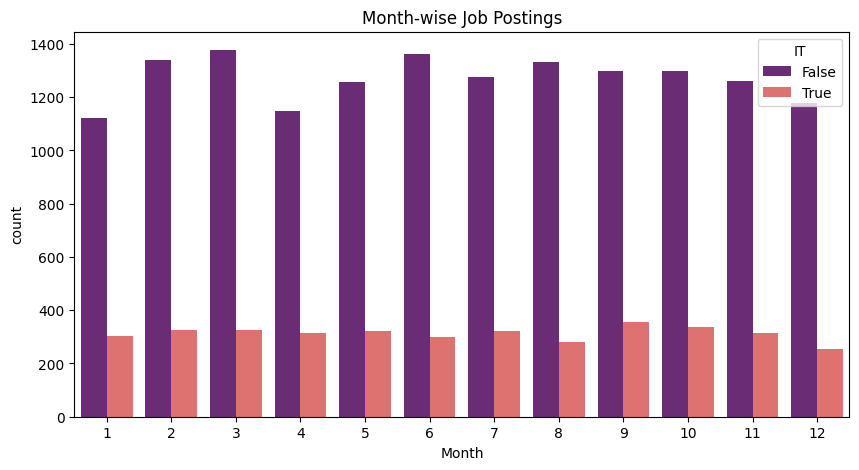

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Month'],hue = df['IT'], palette="magma")
plt.title("Month-wise Job Postings")
plt.show()